# Homework 03 - Nonstandard Evaluation and Git

## Nonstandard Evaluation


### Question 1
Imagine we have a data frame called `data`, with a `type` column. Which one works and why?\
Function 1:
```
group_and_tally <- function(df, column){
    df %>% group_by({{ column }}) %>% tally();
}
group_and_tally(data, type);
```

Function 2:
```
group_and_tally <- function(df, column){
    df %>% group_by(column) %>% tally();
}
group_and_tally(data, type);
```
Function 1 works because group_by() expects a unquoted column name rather than a string. The {{ }} operator tells R to capture the column symbol you pass and evaluate it correctly inside group_by(). Without {{ }}, as in Function 2, group_by(column) treats column literally as a variable in the data frame, not as the name of a column you passed to the function. Since column isn’t a column in data, it fails.

## Git
For the questions below, please add the commands you used to complete these steps.

### Question 2
Set up your git repo on your local computer. If you already make a git repo on GitHub, but it isn’t on your local computer - clone it.

In terminal, git clone https://github.com/sunzhtracy/BIOS512.git

### Question 3
Set up your SSH key.

In terminal, ssh-keygen -t ed25519 -C sunzh@unc.edu
eval "$(ssh-agent -s)"
ssh-add ~/.ssh/id_ed25519
cat ~/.ssh/id_ed25519.pub
I paste the long string to "New SSH key" in my GitHub account setting. 
git remote set-url origin git@github.com:sunzhtracy/BIOS512.git

### Question 4
a) Add a HW2 directory to your git repo through the terminal with a HW.md file that says "This is for homework 2."

In terminal, first use cd to navigate to my local folder for BIOS512 repository
mkdir HW2
echo "This is for homework 2." > HW2/HW.md
git add HW2/HW.md
git commit -m "Add HW2 directory with HW.md"
git push

b) *Add* HW2.md to the staging area. Then, use the command to see which files have been modified, staged for commit, or are untracked. What does it show?
They should copy paste the terminal response after git status, and show that key used the commands below.

c) Save file changes to the main branch.

d) Now, edit the HW2.md file to give it a title.

e) Use the command that compares current, unsaved changes to the main branch. What does it say?\
\
f) Use the command that checks the status of the working directory and the staging area *again*. What does it say?\
\
g) Once again, add HW2.md to the staging area and save the file changes to the main branch. Then, get use the command that gives you project history and paste the output in your homework.

h) Do some searching... What `git` command will provide you documentation on other commands? Use that command to find documentation on `git log` and `git show`. What does `--since` mean in regards to `git log`? Copy and paste what is written in the documentation.

## Tidyverse

Note: Please make sure Binder is set up correctly to run this section. You can follow the instructions here: https://github.com/rjenki/BIOS512. 

**Please show your code for this section!** Before completing this section, please run the following.

In [1]:
library(tidyverse)
if (!dir.exists("intermediate")) dir.create("intermediate", recursive = TRUE)
if (!exists("mdpre")) mdpre <- function(x) { print(x) }
if (!exists("ggmd"))  ggmd  <- function(p) { print(p) }

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Question 5

Download the patient_names.csv and patient_properties.csv files from Canvas and read them into R. Manually set the date columns to be date variables. Print the first 10 observations of each.

In [6]:
patient_names <- read.csv("patient_names.csv", stringsAsFactors = FALSE)
patient_properties <- read.csv("patient_properties.csv", stringsAsFactors = FALSE)
patient_names$BIRTHDATE <- as.Date(patient_names$BIRTHDATE, format = "%m/%d/%y")
patient_names$DEATHDATE <- as.Date(patient_names$DEATHDATE, format = "%m/%d/%y")

patient_names$BIRTHDATE[!is.na(patient_names$BIRTHDATE) & 
                        patient_names$BIRTHDATE > Sys.Date()] <- 
  patient_names$BIRTHDATE[!is.na(patient_names$BIRTHDATE) & 
                          patient_names$BIRTHDATE > Sys.Date()] - 36525 

patient_names$DEATHDATE[!is.na(patient_names$DEATHDATE) & 
                        patient_names$DEATHDATE > Sys.Date()] <- 
  patient_names$DEATHDATE[!is.na(patient_names$DEATHDATE) & 
                          patient_names$DEATHDATE > Sys.Date()] - 36525
head(patient_names, 10)
head(patient_properties, 10)

,ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE
,<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>
1,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NA,Nikita578,Erdman779,Quincy,Massachusetts
2,6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NA,Zane918,Hodkiewicz467,Boston,Massachusetts
3,8123d076-0886-9007-e956-d5864aa121a7,1958-06-04,NA,Quinn173,Marquardt819,Quincy,Massachusetts
4,770518e4-6133-648e-60c9-071eb2f0e2ce,1928-12-25,2017-09-29,Abel832,Smitham825,Boston,Massachusetts
5,f96addf5-81b9-0aab-7855-d208d3d352c5,1928-12-25,2014-02-23,Edwin773,Labadie908,Boston,Massachusetts
6,8e9650d1-788a-78f9-4a28-d08f7f95354a,1928-12-25,NA,Frankie174,Oberbrunner298,Boston,Massachusetts
7,183df435-4190-060e-8f8e-bf63c572b266,1957-11-08,NA,Eilene124,Walsh511,Cambridge,Massachusetts
8,720560d4-51da-c38c-ee90-c15935278df1,1972-06-27,NA,Lowell343,Price929,Quincy,Massachusetts
9,217851b0-5f47-d376-18b9-0fe4ba77207e,1954-03-06,NA,Adrian111,Gleason633,Boston,Massachusetts


,ID,property,value
,<chr>,<chr>,<chr>
1,5605b66b-e92d-c16c-1b83-b8bf7040d51f,MARITAL,M
2,5605b66b-e92d-c16c-1b83-b8bf7040d51f,RACE,white
3,5605b66b-e92d-c16c-1b83-b8bf7040d51f,ETHNICITY,nonhispanic
4,5605b66b-e92d-c16c-1b83-b8bf7040d51f,GENDER,F
5,6e5ae27c-8038-7988-e2c0-25a103f01bfa,MARITAL,M
6,6e5ae27c-8038-7988-e2c0-25a103f01bfa,RACE,white
7,6e5ae27c-8038-7988-e2c0-25a103f01bfa,ETHNICITY,nonhispanic
8,6e5ae27c-8038-7988-e2c0-25a103f01bfa,GENDER,M
9,8123d076-0886-9007-e956-d5864aa121a7,MARITAL,M


### Question 6
In the data frame pulled from patient_properties, you'll notice that the data is long, not wide. Do a pivot to make the properties their own columns. Print the first 10 observations after you do so.

In [7]:
patient_properties_wide <- patient_properties %>%
  pivot_wider(
    names_from = property,   
    values_from = value     
  )
head(patient_properties_wide, 10)

ID,MARITAL,RACE,ETHNICITY,GENDER
<chr>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,M,white,nonhispanic,F
6e5ae27c-8038-7988-e2c0-25a103f01bfa,M,white,nonhispanic,M
8123d076-0886-9007-e956-d5864aa121a7,M,white,nonhispanic,M
770518e4-6133-648e-60c9-071eb2f0e2ce,M,white,hispanic,M
f96addf5-81b9-0aab-7855-d208d3d352c5,M,white,hispanic,M
8e9650d1-788a-78f9-4a28-d08f7f95354a,M,white,hispanic,M
183df435-4190-060e-8f8e-bf63c572b266,M,asian,nonhispanic,F
720560d4-51da-c38c-ee90-c15935278df1,M,white,nonhispanic,M
217851b0-5f47-d376-18b9-0fe4ba77207e,S,black,hispanic,M


### Question 7
Perform a left join of the names and properties_wide data frames by the ID column and print the first 10 rows.

In [8]:
patient_joined <- patient_names %>%
  left_join(patient_properties_wide, by = "ID")
head(patient_joined, 10)

,ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE,MARITAL,RACE,ETHNICITY,GENDER
,<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NA,Nikita578,Erdman779,Quincy,Massachusetts,M,white,nonhispanic,F
2,6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NA,Zane918,Hodkiewicz467,Boston,Massachusetts,M,white,nonhispanic,M
3,8123d076-0886-9007-e956-d5864aa121a7,1958-06-04,NA,Quinn173,Marquardt819,Quincy,Massachusetts,M,white,nonhispanic,M
4,770518e4-6133-648e-60c9-071eb2f0e2ce,1928-12-25,2017-09-29,Abel832,Smitham825,Boston,Massachusetts,M,white,hispanic,M
5,f96addf5-81b9-0aab-7855-d208d3d352c5,1928-12-25,2014-02-23,Edwin773,Labadie908,Boston,Massachusetts,M,white,hispanic,M
6,8e9650d1-788a-78f9-4a28-d08f7f95354a,1928-12-25,NA,Frankie174,Oberbrunner298,Boston,Massachusetts,M,white,hispanic,M
7,183df435-4190-060e-8f8e-bf63c572b266,1957-11-08,NA,Eilene124,Walsh511,Cambridge,Massachusetts,M,asian,nonhispanic,F
8,720560d4-51da-c38c-ee90-c15935278df1,1972-06-27,NA,Lowell343,Price929,Quincy,Massachusetts,M,white,nonhispanic,M
9,217851b0-5f47-d376-18b9-0fe4ba77207e,1954-03-06,NA,Adrian111,Gleason633,Boston,Massachusetts,S,black,hispanic,M


### Question 8
Notice something interesting about the names in our data set. Fix the name formatting and print the first 10 observations.

In [9]:
patient_joined_clean <- patient_joined %>%
  mutate(
    FIRST = str_remove(FIRST, "\\d+$"),
    LAST  = str_remove(LAST, "\\d+$")
  )

head(patient_joined_clean, 10)

,ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE,MARITAL,RACE,ETHNICITY,GENDER
,<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NA,Nikita,Erdman,Quincy,Massachusetts,M,white,nonhispanic,F
2,6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NA,Zane,Hodkiewicz,Boston,Massachusetts,M,white,nonhispanic,M
3,8123d076-0886-9007-e956-d5864aa121a7,1958-06-04,NA,Quinn,Marquardt,Quincy,Massachusetts,M,white,nonhispanic,M
4,770518e4-6133-648e-60c9-071eb2f0e2ce,1928-12-25,2017-09-29,Abel,Smitham,Boston,Massachusetts,M,white,hispanic,M
5,f96addf5-81b9-0aab-7855-d208d3d352c5,1928-12-25,2014-02-23,Edwin,Labadie,Boston,Massachusetts,M,white,hispanic,M
6,8e9650d1-788a-78f9-4a28-d08f7f95354a,1928-12-25,NA,Frankie,Oberbrunner,Boston,Massachusetts,M,white,hispanic,M
7,183df435-4190-060e-8f8e-bf63c572b266,1957-11-08,NA,Eilene,Walsh,Cambridge,Massachusetts,M,asian,nonhispanic,F
8,720560d4-51da-c38c-ee90-c15935278df1,1972-06-27,NA,Lowell,Price,Quincy,Massachusetts,M,white,nonhispanic,M
9,217851b0-5f47-d376-18b9-0fe4ba77207e,1954-03-06,NA,Adrian,Gleason,Boston,Massachusetts,S,black,hispanic,M


### Question 9
Using a for statement to loop through the categorical variables (excluding name and ID), print the counts of each unique value in descending order, using the mdpre() function for formatting.

In [10]:
categorical_vars <- setdiff(
  names(patient_joined_clean),
  c("ID", "FIRST", "LAST", "BIRTHDATE", "DEATHDATE")
)

for (var in categorical_vars) {
  mdpre(paste0("### Counts for ", var))
  
  counts <- patient_joined_clean %>%
    count(.data[[var]]) %>%
    arrange(desc(n))
  
  print(counts)
}

[1] "### Counts for CITY"
             CITY   n
1          Boston 541
2          Quincy  80
3       Cambridge  45
4          Revere  42
5         Chelsea  39
6        Weymouth  37
7      Somerville  25
8         Hingham  22
9        Winthrop  22
10      Brookline  17
11        Everett  16
12           Hull  15
13        Medford  13
14      Braintree  10
15       Cohasset  10
16         Malden   8
17       Scituate   8
18         Newton   6
19       Stoneham   5
20 North Scituate   3
21        Reading   2
22        Belmont   1
23      Lynnfield   1
24        Melrose   1
25         Milton   1
26        Norwell   1
27        Waltham   1
28      Watertown   1
29     Winchester   1
[1] "### Counts for STATE"
          STATE   n
1 Massachusetts 974
[1] "### Counts for MARITAL"
  MARITAL   n
1       M 782
2       S 189
3    Fine   1
4    male   1
5    <NA>   1
[1] "### Counts for RACE"
      RACE   n
1    white 680
2    black 163
3    asian  90
4    other  16
5 hawaiian  13
6   native  11
7  

### Question 10
If you see any weird values, get rid of the ones that don't make sense, and combine the ones that are formatted wrong. Don't forget ot check the dates! Print the new tables for categorical values, and print the date ranges.

In [11]:
patient_clean <- patient_joined_clean %>%
  mutate(MARITAL = ifelse(MARITAL %in% c("M","S"), MARITAL, NA)) %>%
  mutate(RACE = case_when(
    RACE == "asiann" ~ "asian",
    TRUE ~ RACE
  )) %>%
  mutate(ETHNICITY = case_when(
    ETHNICITY == "nonhispani" ~ "nonhispanic",
    ETHNICITY == "hispani" ~ "hispanic",
    TRUE ~ ETHNICITY
  )) %>%
  mutate(GENDER = case_when(
    GENDER %in% c("M", "Male", "male") ~ "M",
    GENDER %in% c("F", "Female", "female") ~ "F",
    TRUE ~ NA_character_
  ))
for (var in c("CITY","STATE","MARITAL","RACE","ETHNICITY","GENDER")) {
  mdpre(paste0("### Counts for ", var))
  counts <- patient_clean %>%
    count(.data[[var]]) %>%
    arrange(desc(n))
  print(counts)
}

mdpre("### Date Ranges")
range(patient_clean$BIRTHDATE, na.rm = TRUE)
range(patient_clean$DEATHDATE, na.rm = TRUE)

[1] "### Counts for CITY"
             CITY   n
1          Boston 541
2          Quincy  80
3       Cambridge  45
4          Revere  42
5         Chelsea  39
6        Weymouth  37
7      Somerville  25
8         Hingham  22
9        Winthrop  22
10      Brookline  17
11        Everett  16
12           Hull  15
13        Medford  13
14      Braintree  10
15       Cohasset  10
16         Malden   8
17       Scituate   8
18         Newton   6
19       Stoneham   5
20 North Scituate   3
21        Reading   2
22        Belmont   1
23      Lynnfield   1
24        Melrose   1
25         Milton   1
26        Norwell   1
27        Waltham   1
28      Watertown   1
29     Winchester   1
[1] "### Counts for STATE"
          STATE   n
1 Massachusetts 974
[1] "### Counts for MARITAL"
  MARITAL   n
1       M 782
2       S 189
3    <NA>   3
[1] "### Counts for RACE"
      RACE   n
1    white 680
2    black 163
3    asian  91
4    other  16
5 hawaiian  13
6   native  11
[1] "### Counts for ETHNICITY"


[1] "1925-11-16" "2025-08-12"

[1] "2011-02-03" "2022-01-27"

### Question 11
Make a histogram of the ages of patients by gender. 

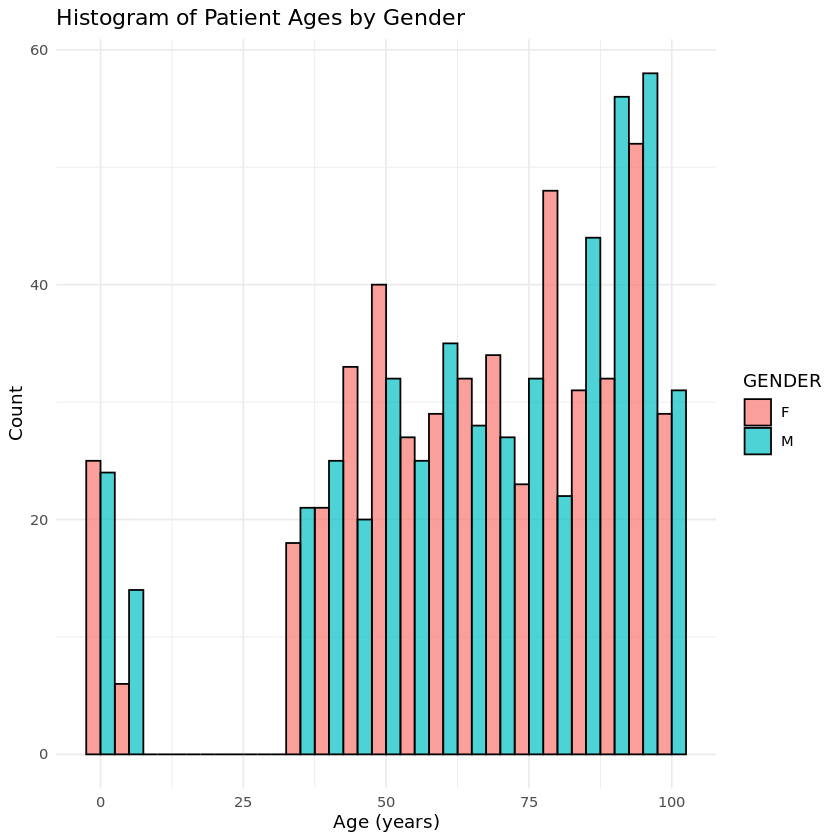

In [13]:
patient_clean <- patient_clean %>%
  mutate(AGE = as.numeric(difftime(Sys.Date(), BIRTHDATE, units = "days")) / 365.25)
ggplot(patient_clean, aes(x = AGE, fill = GENDER)) +
  geom_histogram(binwidth = 5, position = "dodge", color = "black", alpha = 0.7) +
  labs(
    title = "Histogram of Patient Ages by Gender",
    x = "Age (years)",
    y = "Count"
  ) +
  theme_minimal()

### Question 12
Make a scatterplot of birthdate by martial status.

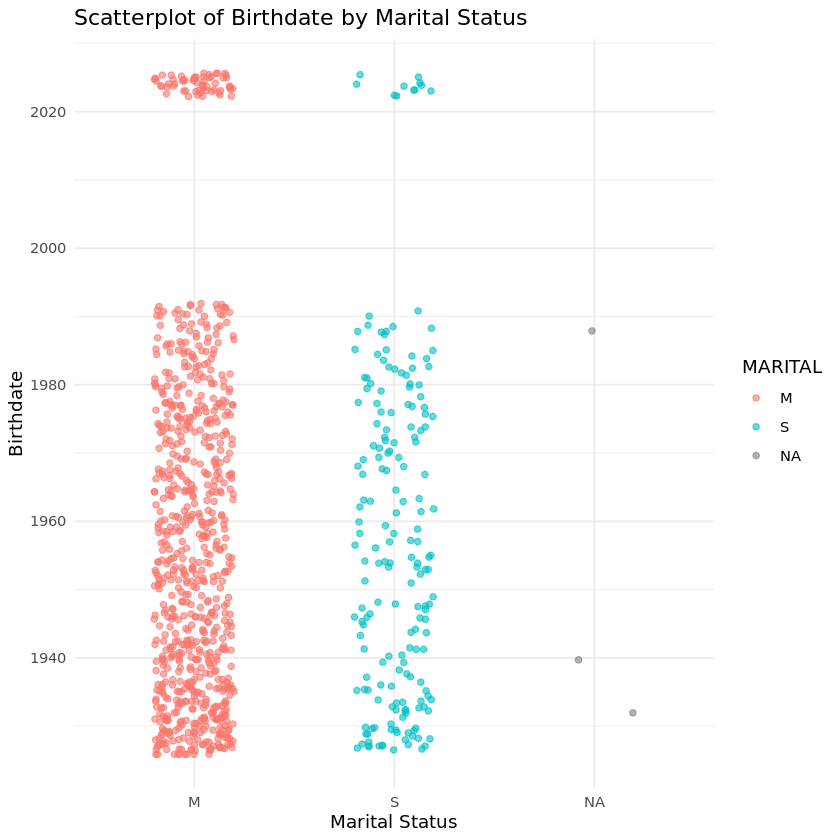

In [16]:
ggplot(patient_clean, aes(x = MARITAL, y = BIRTHDATE, color = MARITAL)) +
  geom_jitter(width = 0.2, height = 0, alpha = 0.6) +
  labs(
    title = "Scatterplot of Birthdate by Marital Status",
    x = "Marital Status",
    y = "Birthdate"
  ) +
  theme_minimal()